In [26]:
import scipy.io as sio
import numpy as np
import os

path = '/Users/lukasgehrke/data/fastReach/data/eeglab2python'

pIDs = [12, 14, 15, 16, 17, 19, 20, 21, 22, 23]

emg = np.zeros((10,1000,70))

i = 0
for pID in pIDs:
    
    pID = 'sub-' + "%03d" % (pID)

    # load data
    emg[i,:,:] = sio.loadmat(path+os.sep+pID+os.sep+'emg_tap.mat')['emg_tap'][0,:,0:70]
    i += 1

In [27]:
# absolute value
emg = np.abs(emg)
emg = np.mean(emg, axis=2).T

In [42]:
# dataframe from emg
import pandas as pd
df = pd.DataFrame(emg)

# wide to long
df = df.stack().reset_index()

df.level_0 = df.level_0 - 500
df.level_0 = df.level_0 / 250

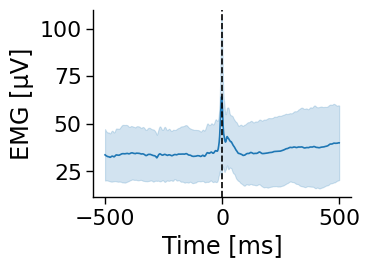

In [48]:
# plot emg
import seaborn as sns
import matplotlib.pyplot as plt

with sns.plotting_context('paper', font_scale = 1.8):

    ### Create new plot
    fig, ax = plt.subplots(1, 1, figsize=(4,3))
    fig.patch.set_alpha(1)

    sns.despine() #bottom=True, left=True

    sns.lineplot(data=df, x='level_0', y=0, errorbar='sd')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('EMG (µV)')

    # ax.set_title('EMG during tapping')

    # vertical line at 0
    ax.axvline(x=0, color='black', linestyle='--')

    plt.tight_layout()
    plt.show()